In [36]:

#1 1. Collect the data (5 points)
#Choose at least ten subreddits to collect data from. You can choose any that you like, or go with some of the most popular, listed here. Store the list in a .txt file and read it into your script (1pt).

#Collect data from the subreddits. 

#2. Get the top 100 posts and their comments from each subreddit. Store the following data for each post:

#subreddit: the name of the subreddit
#id: the unique identifier for the post
#score: the score of the post
#author: the author of the post
#created_utc: the time the post was created
#For submissions, also add:

#title: the title of the post
#selftext: the body of the post
#num_comments: the number of comments on the post
#For comments, add:

#comment: the body of the comment
#parent_id: the unique identifier of the parent post
#Store the data in two csv files, one for the submissions and one for the comments (4pts).


#1.1 Txt file is newlist.txt

#read.newlist.txt









In [2]:
import pandas as pd
import matplotlib.pyplot as plt #I was looking around for another way and I came across this kind of import
import datetime
import re

In [3]:
#1.2

comments_df = pd.read_csv('C:/Users/gabri/OneDrive/Documents/GitHub/bfor-caruso/data/comments_df_10.csv')
submission_df = pd.read_csv('C:/Users/gabri/OneDrive/Documents/GitHub/bfor-caruso/data/submissions_df_10.csv')

topposts_df = pd.concat([comments_df.head(100), submission_df.head(100)])

topposts_df.head(100)

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit,title,num_comments,selftext
0,0,fgs7erl,12353,1.581075e+09,They'd be fine.\n\nThe problem with poverty is...,t3_f08dxb,squigs,AskReddit,NaN,NaN,NaN
1,1,fgs4uvj,8277,1.581072e+09,I doubt a month is enough to really feel the e...,t3_f08dxb,_rightClick_,AskReddit,NaN,NaN,NaN
2,2,fgs9v44,450,1.581078e+09,It would be better if they had to live *with* ...,t3_f08dxb,thinksoftchildren,AskReddit,NaN,NaN,NaN
3,3,fgs5ek3,9072,1.581072e+09,It would be incredibly self-serving and boring...,t3_f08dxb,theacemaverick,AskReddit,NaN,NaN,NaN
4,4,fgs78x5,38086,1.581075e+09,There was this similar themed show in Hongkong...,t3_f08dxb,Eggmatros,AskReddit,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,95,fgsns9w,11,1.581089e+09,"“Yes, $10,000 unless we want two ply. Then it’...",t1_fgsh730,ClownfishSoup,AskReddit,NaN,NaN,NaN
96,96,fgse3ln,1252,1.581082e+09,"Anyone remember ""The Simple Life"" with Paris H...",t1_fgsciiz,Batchet,AskReddit,NaN,NaN,NaN
97,97,fgsl67u,839,1.581087e+09,Undercover Boss was fantastic propaganda.\n\n#...,t1_fgsfxlw,missed_sla,AskReddit,NaN,NaN,NaN
98,98,fgsilbw,1469,1.581085e+09,What I didnt like about undercover boss was it...,t1_fgsfxlw,jittery_raccoon,AskReddit,NaN,NaN,NaN


In [4]:
#2.1

topposts_df.head(5)

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit,title,num_comments,selftext
0,0,fgs7erl,12353,1.581075e+09,They'd be fine.\n\nThe problem with poverty is...,t3_f08dxb,squigs,AskReddit,NaN,NaN,NaN
1,1,fgs4uvj,8277,1.581072e+09,I doubt a month is enough to really feel the e...,t3_f08dxb,_rightClick_,AskReddit,NaN,NaN,NaN
2,2,fgs9v44,450,1.581078e+09,It would be better if they had to live *with* ...,t3_f08dxb,thinksoftchildren,AskReddit,NaN,NaN,NaN
3,3,fgs5ek3,9072,1.581072e+09,It would be incredibly self-serving and boring...,t3_f08dxb,theacemaverick,AskReddit,NaN,NaN,NaN
4,4,fgs78x5,38086,1.581075e+09,There was this similar themed show in Hongkong...,t3_f08dxb,Eggmatros,AskReddit,NaN,NaN,NaN


In [5]:
#2.2
comments_df.dropna(inplace=True)
# from: https://stackoverflow.com/questions/19231871/
comments_df['created_time'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# get dataframe with unique pairings of subreddit and author
sub_author_unique = comments_df.groupby(['subreddit', 'author'])['created_time'].count().reset_index()

# count the number of these pairings for each subreddit
sub_author_unique.groupby('subreddit')['author'].count().sort_values(ascending=False)

subreddit
news              794
AskReddit         758
videos            749
Music             413
aww               405
Showerthoughts    366
todayilearned     359
Name: author, dtype: int64

In [11]:
#2.3

comments_df = pd.read_csv('C:/Users/gabri/OneDrive/Documents/GitHub/bfor-caruso/data/comments_df_10.csv')

comments_df.head()

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit
0,0,fgs7erl,12353,1.581075e+09,They'd be fine.\n\nThe problem with poverty is...,t3_f08dxb,squigs,AskReddit
1,1,fgs4uvj,8277,1.581072e+09,I doubt a month is enough to really feel the e...,t3_f08dxb,_rightClick_,AskReddit
2,2,fgs9v44,450,1.581078e+09,It would be better if they had to live *with* ...,t3_f08dxb,thinksoftchildren,AskReddit
3,3,fgs5ek3,9072,1.581072e+09,It would be incredibly self-serving and boring...,t3_f08dxb,theacemaverick,AskReddit
4,4,fgs78x5,38086,1.581075e+09,There was this similar themed show in Hongkong...,t3_f08dxb,Eggmatros,AskReddit


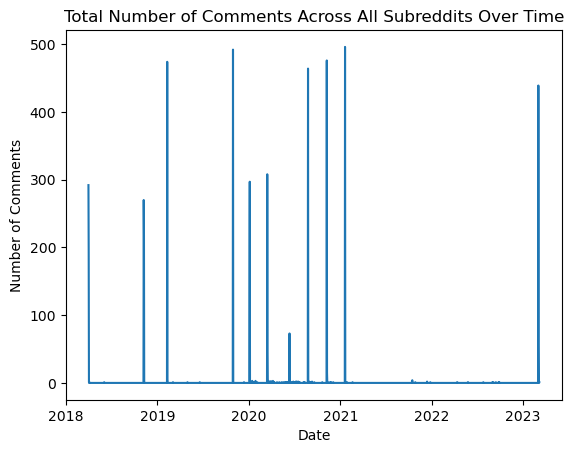

In [35]:
#3.1


# Convert the created_utc field to a datetime object 
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Group the data by day and sum the number of comments for each day
comments_df = comments_df.groupby(pd.Grouper(key='created_utc', freq='D')).agg({'id': 'count'})

# Plot the data as a line plot
plt.plot(comments_df.index, comments_df['id'])
plt.title('Total Number of Comments Across All Subreddits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()



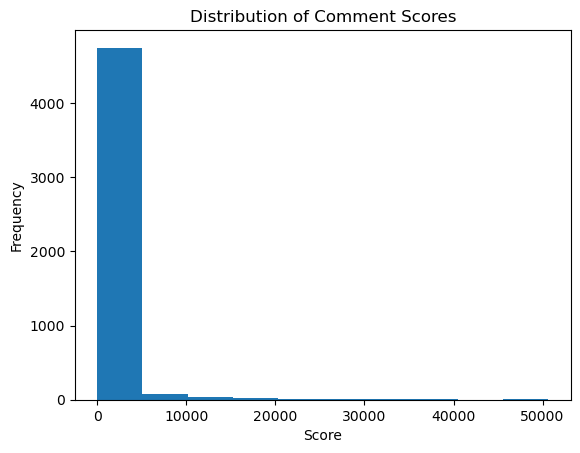

In [65]:
#3.2
comments_df = pd.read_csv('C:/Users/gabri/OneDrive/Documents/GitHub/bfor-caruso/data/comments_df_10.csv')
plt.hist(comments_df['score'], bins=10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Scores')
plt.show()

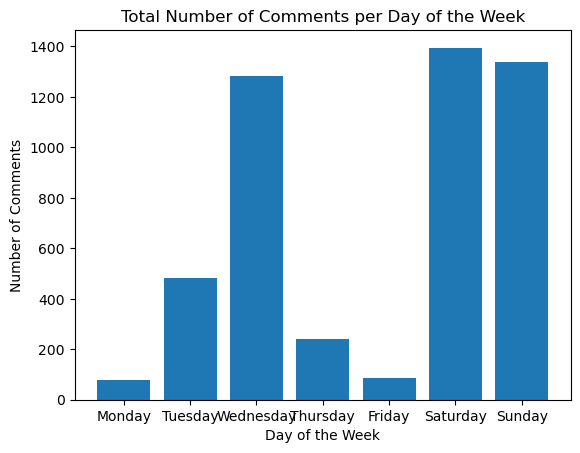

In [76]:
#3.3



# Convert the created_utc column to a datetime object and extract the day of the week
comments_df['dow'] = pd.to_datetime(comments_df['created_utc'], unit='s').dt.day_name()

# Create a categorical variable for the day of the week and sort the categories
comments_df['dow'] = pd.Categorical(comments_df['dow'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

# Group the comments by day of the week and count the number of comments
dow_counts = comments_df.groupby('dow')['created_utc'].count()

# Plot a bar chart of the total number of comments per day of the week
plt.bar(dow_counts.index, dow_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Comments')
plt.title('Total Number of Comments per Day of the Week')
plt.show()


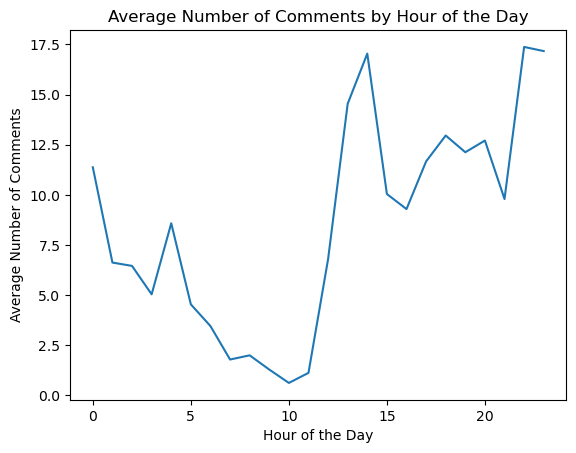

In [77]:
#3.4

# Convert the created_utc column to a datetime object and extract the hour
comments_df['hour'] = pd.to_datetime(comments_df['created_utc'], unit='s').dt.hour

# Group the comments by hour of the day and calculate the mean number of comments
hourly_means = comments_df.groupby('hour')['created_utc'].count().div(24)

# Plot a line chart of the average number of comments by hour of the day
plt.plot(hourly_means.index, hourly_means.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments')
plt.title('Average Number of Comments by Hour of the Day')
plt.show()

In [ ]:
#4.1
#Does the length of a post title correlate with score of the post? Yes it shows both the timeline and the typical day data within the subreddit.




In [26]:
#4.2



from collections import Counter 
results = Counter() 
comments_df['body'].str.split().apply(results.update)
print(results.most_common(20))



[('the', 5112), ('to', 4157), ('a', 3738), ('and', 3345), ('I', 2990), ('of', 2558), ('in', 1821), ('that', 1711), ('is', 1605), ('for', 1497), ('was', 1475), ('it', 1301), ('you', 1224), ('my', 952), ('be', 939), ('with', 929), ('on', 895), ('have', 826), ('he', 818), ('but', 786)]


In [44]:
#4.3


import  text_processing # this is the script we created in class (text_processing.py)

comments_df['urls'] = comments_df['body'].apply(text_processing.find_urls)







ModuleNotFoundError: No module named 'text_processing'

In [ ]:
#4.4

#Some other interesting things to analyze would be like the least viewed posts and the mean of all the posts.